In [1]:
import pandas as pd
import numpy as np
# import numpy.linalg as la

df = pd.read_excel(r'C:\Users\vivek\Downloads\Lab Session Data.xlsx')
df = df.dropna(axis = 1)
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [2]:
# No.1
A = df.iloc[:, 1:-1].values
B =df.iloc[:, -1].values

A = np.array(A)
B = np.array(B)

print("Matrix A :")
print(A)
print("Matrix B :")
print(B)

# number of vectors in vector space
noOfVector = A.shape[0]
print('Number of vector is : ', noOfVector)


# Dimensionality of the given vector space
Dimensionality = A.shape[1]
print("Dimensionality of vector space is" , Dimensionality)

# Rank of matrix A
rankOfA = np.linalg.matrix_rank(A)
print('Rank of Matrix A: ', rankOfA)

Matrix A :
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix B :
[386 289 393 110 280 167 271 274 148 198]
Number of vector is :  10
Dimensionality of vector space is 3
Rank of Matrix A:  3


In [3]:
# Using Pseudo-Inverse find the cost of each product available for sale.
# (Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a
# pseudo-inverse.)

pseudoInverse = np.linalg.pinv(A)
priceOfEachProduct = np.dot(pseudoInverse, B)
print(priceOfEachProduct)

[ 1. 55. 18.]


In [4]:
# No.2
# Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
# available with the vendor.

X = np.dot(pseudoInverse, B)
print(X)

[ 1. 55. 18.]


In [5]:
# No. 3
# Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
# as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
# purchase behavior.

df['Category'] = df['Payment (Rs)'] > 200
df['Category'] = df['Category'].replace({True:'Rich', False:'Poor'})

print(df)


  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Category
0      C_1           20             6                 2           386     Rich
1      C_2           16             3                 6           289     Rich
2      C_3           27             6                 2           393     Rich
3      C_4           19             1                 2           110     Poor
4      C_5           24             4                 2           280     Rich
5      C_6           22             1                 5           167     Poor
6      C_7           15             4                 2           271     Rich
7      C_8           18             4                 2           274     Rich
8      C_9           21             1                 4           148     Poor
9     C_10           16             2                 4           198     Poor


In [6]:
# No. 4
# Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file.

irctc_data = pd.read_excel(r'C:\Users\vivek\Downloads\Lab Session Data.xlsx', sheet_name = 'IRCTC Stock Price')
irctc_data = irctc_data.dropna(axis=1)
print(irctc_data)

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

In [7]:
# Calculate mean and variance
price_mean = irctc_data['Price'].mean()
price_variance = irctc_data['Price'].var()
print('Mean of Price:', price_mean , 'Variance of Price:', price_variance)

Mean of Price: 1560.6634538152612 Variance of Price: 58732.36535253918


In [8]:
# Ensuring the 'Date' column is in datetime format
irctc_data['Date'] = pd.to_datetime(irctc_data['Date'])

# Calculating sample mean for Wednesdays
# 0-monday, 6-sunday
wednesday_data = irctc_data[irctc_data['Date'].dt.weekday == 2]
wednesday_mean = wednesday_data['Price'].mean()
print('Mean for Wednesdays:', wednesday_mean)

Mean for Wednesdays: 1550.7060000000001


In [9]:
# Calculate sample mean for April
april_data = irctc_data[irctc_data['Date'].dt.month == 4]
april_mean = april_data['Price'].mean()
print(f"Sample mean for April: {april_mean}")

Sample mean for April: 1698.9526315789474


In [10]:
# Probability of making a loss over the stock
#  Boolean Series where True indicates a loss (negative change) and False indicates a profit
loss_prob = (irctc_data['Chg%'] < 0).mean()
print(f"Probability of making a loss: {loss_prob}")

# Probability of making a profit on Wednesday
profit_wed_prob = (wednesday_data['Chg%'] > 0).mean()
print(f"Probability of making a profit on Wednesday: {profit_wed_prob}")

Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42


In [11]:
# Conditional probability of making profit given that today is Wednesday
conditional_probab = profit_wed_prob / (irctc_data['Chg%'] > 0).mean()
print(f"Conditional probability of making profit given the day is Wednesday: {conditional_probab}")

Conditional probability of making profit given the day is Wednesday: 0.8433870967741935


In [12]:

# import seaborn as sns
import matplotlib.pyplot as plt

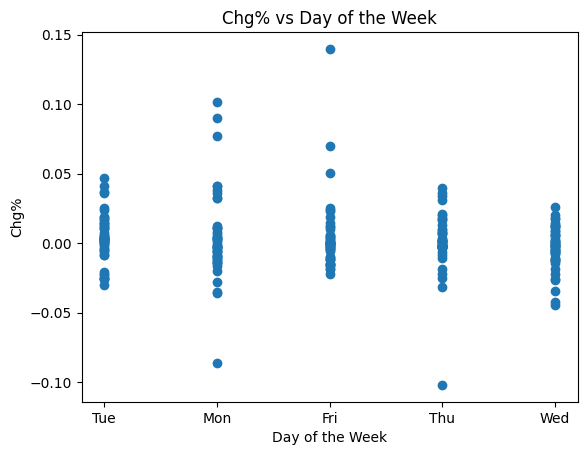

In [13]:
# Scatter plot of Chg% data against the day of the week
# irctc_data['Day of Week'] = irctc_data['Date'].dt.day_name()
plt.scatter(x='Day', y='Chg%', data=irctc_data)
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Chg% vs Day of the Week')
plt.show()

In [14]:
# No. 5
# Load the thyroid data
thyroid_data = pd.read_excel(r'C:\Users\vivek\Downloads\Lab Session Data.xlsx', sheet_name='thyroid0387_UCI')
thyroid_data

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,M,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,NO CONDITION
9168,870119023,22,M,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,NO CONDITION
9169,870119025,69,M,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I
9170,870119027,47,F,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,NO CONDITION


In [15]:
# Study each attribute
numeric_columns = thyroid_data.select_dtypes(include=['number']).columns
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_columns)
print()
print("Categorical Columns:", categorical_columns)

Numeric Columns: Index(['Record ID', 'age'], dtype='object')

Categorical Columns: Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


In [17]:
thyroid_data.replace("?", np.nan, inplace=True)

# Convert columns to numeric, errors='coerce' will convert non-convertible values to NaN
thyroid_data = thyroid_data.apply(pd.to_numeric, errors='coerce')

# Study data range for numeric variables
print(thyroid_data.describe())

          Record ID           age  sex  on thyroxine  query on thyroxine  \
count  9.172000e+03   9172.000000  0.0           0.0                 0.0   
mean   8.529473e+08     73.555822  NaN           NaN                 NaN   
std    7.581969e+06   1183.976718  NaN           NaN                 NaN   
min    8.408010e+08      1.000000  NaN           NaN                 NaN   
25%    8.504090e+08     37.000000  NaN           NaN                 NaN   
50%    8.510040e+08     55.000000  NaN           NaN                 NaN   
75%    8.607110e+08     68.000000  NaN           NaN                 NaN   
max    8.701190e+08  65526.000000  NaN           NaN                 NaN   

       on antithyroid medication  sick  pregnant  thyroid surgery  \
count                        0.0   0.0       0.0              0.0   
mean                         NaN   NaN       NaN              NaN   
std                          NaN   NaN       NaN              NaN   
min                          NaN   NaN 

In [18]:
# Study presence of missing values
missing_values = thyroid_data.isnull().sum()
print(missing_values)

Record ID                       0
age                             0
sex                          9172
on thyroxine                 9172
query on thyroxine           9172
on antithyroid medication    9172
sick                         9172
pregnant                     9172
thyroid surgery              9172
I131 treatment               9172
query hypothyroid            9172
query hyperthyroid           9172
lithium                      9172
goitre                       9172
tumor                        9172
hypopituitary                9172
psych                        9172
TSH measured                 9172
TSH                           842
T3 measured                  9172
T3                           2604
TT4 measured                 9172
TT4                           442
T4U measured                 9172
T4U                           809
FTI measured                 9172
FTI                           802
TBG measured                 9172
TBG                          8823
referral sourc

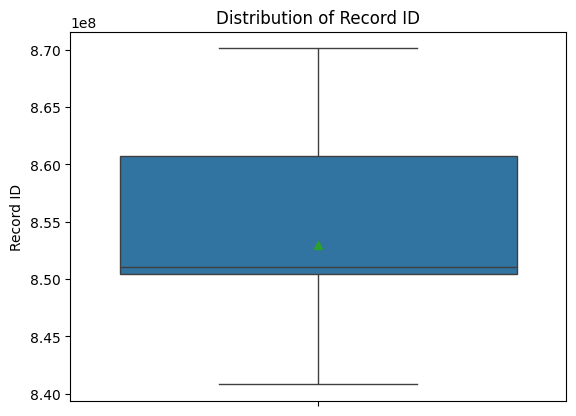

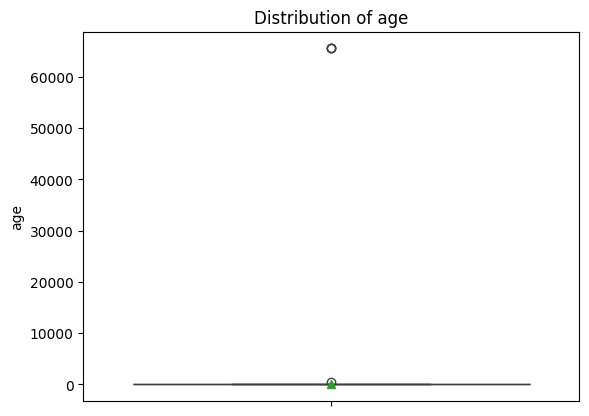

Skipping sex because it contains only NaN values.
Skipping on thyroxine because it contains only NaN values.
Skipping query on thyroxine because it contains only NaN values.
Skipping on antithyroid medication because it contains only NaN values.
Skipping sick because it contains only NaN values.
Skipping pregnant because it contains only NaN values.
Skipping thyroid surgery because it contains only NaN values.
Skipping I131 treatment because it contains only NaN values.
Skipping query hypothyroid because it contains only NaN values.
Skipping query hyperthyroid because it contains only NaN values.
Skipping lithium because it contains only NaN values.
Skipping goitre because it contains only NaN values.
Skipping tumor because it contains only NaN values.
Skipping hypopituitary because it contains only NaN values.
Skipping psych because it contains only NaN values.
Skipping TSH measured because it contains only NaN values.


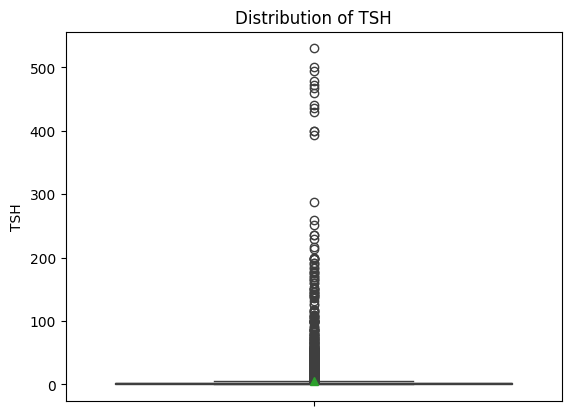

Skipping T3 measured because it contains only NaN values.


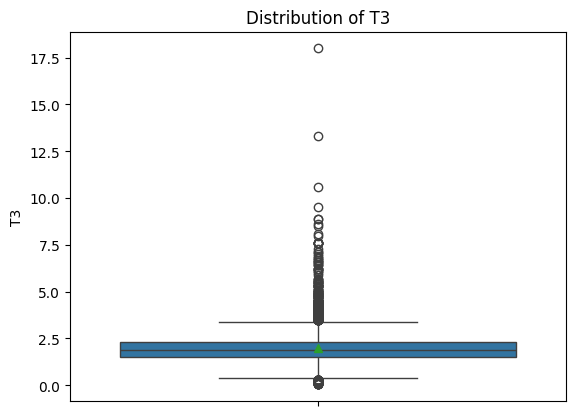

Skipping TT4 measured because it contains only NaN values.


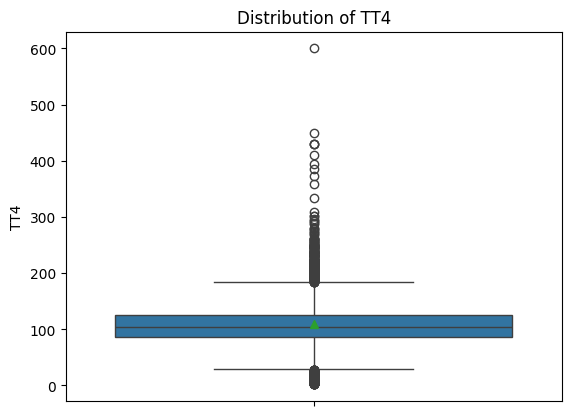

Skipping T4U measured because it contains only NaN values.


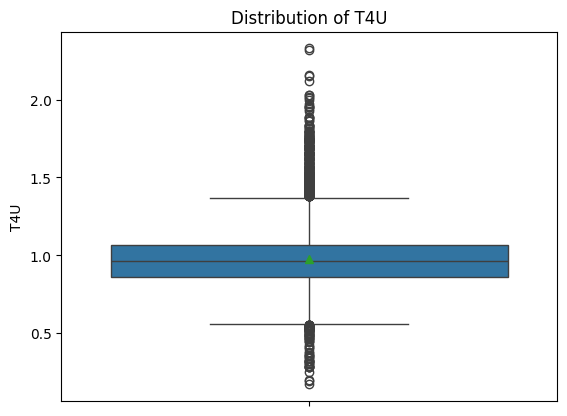

Skipping FTI measured because it contains only NaN values.


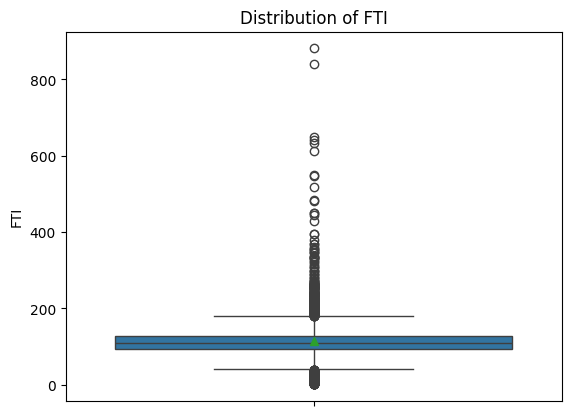

Skipping TBG measured because it contains only NaN values.


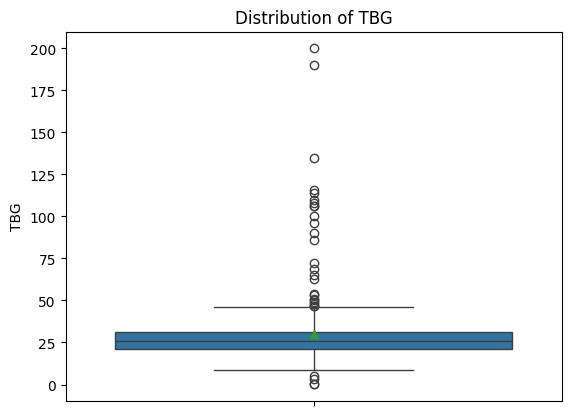

Skipping referral source because it contains only NaN values.
Skipping Condition because it contains only NaN values.


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the numerical columns
numeric_columns = thyroid_data.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each column and create a box plot with title
for column in numeric_columns:
    # Check if the column has non-NaN values
    if thyroid_data[column].dropna().empty:
        print(f"Skipping {column} because it contains only NaN values.")
        continue
    
    # Create the box plot
    sns.boxplot(
        y=column,  # Use 'y' instead of 'x' for numerical data
        showmeans=True,  # Display the mean value on the box plot
        data=thyroid_data
    )
    plt.title(f"Distribution of {column}")  # Add title with column name
    plt.show()  # Display the plot


In [20]:
# Get the numerical columns
numeric_columns = thyroid_data.select_dtypes(include=['float64', 'int64']).columns

# Drop columns that contain only NaN values
numeric_data_non_null = thyroid_data[numeric_columns].dropna(axis=1, how='all')

# Calculate mean and variance for columns that have non-null values
mean_values = numeric_data_non_null.mean()
variance_values = numeric_data_non_null.var()

print("Mean values:\n", mean_values)
print("Variance values:\n", variance_values)


Mean values:
 Record ID    8.529473e+08
age          7.355582e+01
TSH          5.218403e+00
T3           1.970629e+00
TT4          1.087003e+02
T4U          9.760557e-01
FTI          1.136407e+02
TBG          2.987006e+01
dtype: float64
Variance values:
 Record ID    5.748625e+13
age          1.401801e+06
TSH          5.848662e+02
T3           7.877962e-01
TT4          1.407951e+03
T4U          4.014431e-02
FTI          1.726540e+03
TBG          4.443876e+02
dtype: float64


In [21]:
# import pandas as pd

# thyroid_data = pd.read_excel(r'C:\Users\vivek\Downloads\Lab Session Data.xlsx', sheet_name='thyroid0387_UCI')

# Iterate over each column in the DataFrame
for column in thyroid_data.columns:
    # If the column is numeric
    if thyroid_data[column].dtype in ['int64', 'float64']:
        # Check for outliers using the Interquartile Range (IQR) method
        Q1 = thyroid_data[column].quantile(0.25)
        Q3 = thyroid_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # If there are outliers, use the median to fill NaN
        if thyroid_data[column].lt(lower_bound).any() or thyroid_data[column].gt(upper_bound).any():
            median_value = thyroid_data[column].median()
            thyroid_data[column] = thyroid_data[column].fillna(median_value)
        else:  # If there are no outliers, use the mean to fill NaN
            mean_value = thyroid_data[column].mean()
            thyroid_data[column] = thyroid_data[column].fillna(mean_value)
    
    # If the column is categorical
    elif thyroid_data[column].dtype == 'object':
        mode_value = thyroid_data[column].mode()[0]
        thyroid_data[column] = thyroid_data[column].fillna(mode_value)

# Display the DataFrame after imputation
print(thyroid_data)


      Record ID  age  sex  on thyroxine  query on thyroxine  \
0     840801013   29  NaN           NaN                 NaN   
1     840801014   29  NaN           NaN                 NaN   
2     840801042   41  NaN           NaN                 NaN   
3     840803046   36  NaN           NaN                 NaN   
4     840803047   32  NaN           NaN                 NaN   
...         ...  ...  ...           ...                 ...   
9167  870119022   56  NaN           NaN                 NaN   
9168  870119023   22  NaN           NaN                 NaN   
9169  870119025   69  NaN           NaN                 NaN   
9170  870119027   47  NaN           NaN                 NaN   
9171  870119035   31  NaN           NaN                 NaN   

      on antithyroid medication  sick  pregnant  thyroid surgery  \
0                           NaN   NaN       NaN              NaN   
1                           NaN   NaN       NaN              NaN   
2                           NaN   NaN  